## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the `Severity` of a car crash given info about the crash, e.g., location.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

### Checklist
You can participate in this competition the way you perefer. However, I recommend following these steps if this is your first time joining a competition on Kaggle.

* Fork this notebook and run the cells in order.
* Submit this solution.
* Make changes to the data processing step as you see fit.
* Submit the new solutions.

*You can submit up to 5 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Don't hesitate to leave a comment or contact me if you have any question!

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
import pandas as pd
import os

## Exploratory Data Analysis
In this step, one should load the data and analyze it. However, I'll load the data and do minimal analysis. You are encouraged to do thorough analysis!

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [2]:
dataset_path = '/kaggle/input/car-crashes-severity-prediction/'

#df = pd.read_csv(os.path.join('train.csv'))
df=pd.read_csv('train.csv')

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


We've got 6407 examples in the dataset with 14 featues, 1 ID, and the `Severity` of the crash.

By looking at the features and a sample from the data, the features look of numerical and catogerical types. What about some descriptive statistics?

# Finding missing/duplicated values

In [3]:
df.isnull().sum()

ID              0
Lat             0
Lng             0
Bump            0
Distance(mi)    0
Crossing        0
Give_Way        0
Junction        0
No_Exit         0
Railway         0
Roundabout      0
Stop            0
Amenity         0
Side            0
Severity        0
timestamp       0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df['timestamp']

0       2016-03-25 15:13:02
1       2020-05-05 19:23:00
2       2016-09-16 19:57:16
3       2020-03-29 19:48:43
4       2019-10-09 08:47:00
               ...         
6402    2017-10-01 18:36:13
6403    2018-10-23 07:40:27
6404    2019-10-28 15:45:00
6405    2019-05-04 13:45:31
6406    2020-02-28 19:43:00
Name: timestamp, Length: 6407, dtype: object

# Reading weather dataset

In [6]:
weather = pd.read_csv('weather-sfcsv.csv')
weather.shape

(6901, 12)

### Compressing year,month,day into one column of type date

In [7]:
weather['new_date_column'] = pd.to_datetime(weather[['Year', 'Month', 'Day']])
weather['new_date_column']

0      2020-07-27
1      2017-09-30
2      2017-06-27
3      2016-09-07
4      2019-10-19
          ...    
6896   2018-01-23
6897   2019-06-16
6898   2017-02-07
6899   2016-04-22
6900   2016-12-11
Name: new_date_column, Length: 6901, dtype: datetime64[ns]

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               6901 non-null   int64         
 1   Day                6901 non-null   int64         
 2   Month              6901 non-null   int64         
 3   Hour               6901 non-null   int64         
 4   Weather_Condition  6900 non-null   object        
 5   Wind_Chill(F)      3292 non-null   float64       
 6   Precipitation(in)  3574 non-null   float64       
 7   Temperature(F)     6899 non-null   float64       
 8   Humidity(%)        6899 non-null   float64       
 9   Wind_Speed(mph)    6556 non-null   float64       
 10  Visibility(mi)     6900 non-null   float64       
 11  Selected           6901 non-null   object        
 12  new_date_column    6901 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(4), object(2)
memory us

#### Wind_Chill(F) and Precipitation(in)  have over 50% missing values, best practice is to drop these columns

In [9]:
weather.drop(['Wind_Chill(F)', 'Precipitation(in)'], axis=1, inplace=True)

#### Wind_Speed(mph) has only 5% missing values

In [10]:
weather[weather['Wind_Speed(mph)'].isnull()]

,Year,Day,Month,Hour,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,new_date_column
30,2017,15,3,5,Overcast,54.0,100.0,NaN,10.0,No,2017-03-15
38,2017,22,11,0,Clear,55.9,97.0,NaN,10.0,No,2017-11-22
49,2016,20,10,14,Partly Cloudy,72.0,43.0,NaN,10.0,No,2016-10-20
90,2018,1,1,3,Scattered Clouds,48.0,89.0,NaN,8.0,No,2018-01-01
95,2018,4,2,1,Partly Cloudy,55.0,89.0,NaN,10.0,No,2018-02-04
...,...,...,...,...,...,...,...,...,...,...,...
6808,2017,11,11,4,Shallow Fog,51.1,100.0,NaN,7.0,No,2017-11-11
6811,2018,5,9,8,Overcast,57.9,81.0,NaN,10.0,No,2018-09-05
6820,2019,10,1,19,Partly Cloudy,57.0,72.0,NaN,8.0,No,2019-01-10
6845,2019,8,1,11,Light Rain,57.0,83.0,NaN,10.0,No,2019-01-08


(array([ 888., 1665., 1449., 1334.,  631.,  384.,  155.,   40.,    5.,
           5.]),
 array([ 0.  ,  4.03,  8.06, 12.09, 16.12, 20.15, 24.18, 28.21, 32.24,
        36.27, 40.3 ]),
 <BarContainer object of 10 artists>)

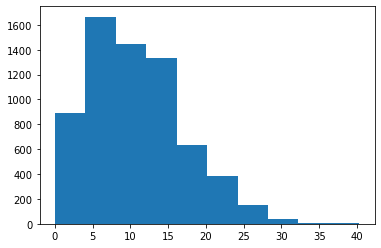

In [11]:
import matplotlib.pyplot as plt
plt.hist(weather['Wind_Speed(mph)'])

In [12]:
weather.isnull().sum()

Year                   0
Day                    0
Month                  0
Hour                   0
Weather_Condition      1
Temperature(F)         2
Humidity(%)            2
Wind_Speed(mph)      345
Visibility(mi)         1
Selected               0
new_date_column        0
dtype: int64

#### Data has a skewed distribution, so its better to impute missing values by the median of the column

In [13]:
weather['Wind_Speed(mph)'].fillna(weather['Wind_Speed(mph)'].median(), inplace=True) 

In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               6901 non-null   int64         
 1   Day                6901 non-null   int64         
 2   Month              6901 non-null   int64         
 3   Hour               6901 non-null   int64         
 4   Weather_Condition  6900 non-null   object        
 5   Temperature(F)     6899 non-null   float64       
 6   Humidity(%)        6899 non-null   float64       
 7   Wind_Speed(mph)    6901 non-null   float64       
 8   Visibility(mi)     6900 non-null   float64       
 9   Selected           6901 non-null   object        
 10  new_date_column    6901 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 593.2+ KB


In [15]:
weather.dropna(inplace=True)

In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6899 entries, 0 to 6900
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               6899 non-null   int64         
 1   Day                6899 non-null   int64         
 2   Month              6899 non-null   int64         
 3   Hour               6899 non-null   int64         
 4   Weather_Condition  6899 non-null   object        
 5   Temperature(F)     6899 non-null   float64       
 6   Humidity(%)        6899 non-null   float64       
 7   Wind_Speed(mph)    6899 non-null   float64       
 8   Visibility(mi)     6899 non-null   float64       
 9   Selected           6899 non-null   object        
 10  new_date_column    6899 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 646.8+ KB


In [17]:
weather.duplicated().sum()

0

In [18]:
weather.std()

Year                1.390487
Day                 8.704956
Month               3.568368
Hour                5.873393
Temperature(F)      7.977860
Humidity(%)        16.180126
Wind_Speed(mph)     6.246875
Visibility(mi)      1.640619
dtype: float64

In [19]:
weather.columns

Index(['Year', 'Day', 'Month', 'Hour', 'Weather_Condition', 'Temperature(F)',
       'Humidity(%)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Selected',
       'new_date_column'],
      dtype='object')

In [20]:
df.var()

ID              3.421338e+06
Lat             1.059813e-03
Lng             7.994698e-04
Bump            0.000000e+00
Distance(mi)    1.571013e-01
Crossing        7.563028e-02
Give_Way        4.680917e-04
Junction        1.857410e-01
No_Exit         1.560793e-04
Railway         2.583349e-02
Roundabout      0.000000e+00
Stop            8.817301e-02
Amenity         3.577256e-02
Severity        2.716755e-01
dtype: float64

#### 'Bump', 'Give_Way','No_Exit','Roundabout' columns has almost Zero variance, we will drop them
#### Also ID column is useless 

In [21]:
df.drop(['Bump', 'Give_Way','No_Exit','Roundabout','Lat' ,'Lng'], axis=1, inplace=True)

#### Extracting the date only from timestamp column in order to merge it with Weather dataset

In [22]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['new_date_column'] = df['timestamp'].dt.date
df['new_date_column'] = pd.to_datetime(df['new_date_column'])

In [23]:
def Convert_to_int(Df_col) :
    df[Df_col] = df[Df_col].astype(int)
Convert_to_int('Crossing')
Convert_to_int('Junction')
Convert_to_int('Railway')
Convert_to_int('Stop')
Convert_to_int('Amenity')

In [24]:
df['Side'] = df['Side'].replace({'R':0 ,'L':1})
df['Side']

0       0
1       0
2       0
3       0
4       0
       ..
6402    0
6403    0
6404    0
6405    0
6406    0
Name: Side, Length: 6407, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               6407 non-null   int64         
 1   Distance(mi)     6407 non-null   float64       
 2   Crossing         6407 non-null   int32         
 3   Junction         6407 non-null   int32         
 4   Railway          6407 non-null   int32         
 5   Stop             6407 non-null   int32         
 6   Amenity          6407 non-null   int32         
 7   Side             6407 non-null   int64         
 8   Severity         6407 non-null   int64         
 9   timestamp        6407 non-null   datetime64[ns]
 10  new_date_column  6407 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(5), int64(3)
memory usage: 425.6 KB


## Merging both datasets

In [26]:
df = df.sort_values('new_date_column')
weather = weather.sort_values('new_date_column')

In [27]:
dfx = pd.merge_asof(df, weather, on='new_date_column')
dfx

,ID,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,timestamp,...,Year,Day,Month,Hour,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,3657,0.000,0,1,0,0,0,0,2,2016-03-23 20:21:57,...,2016,23,3,20,Scattered Clouds,59.0,67.0,12.7,10.0,No
1,3724,0.010,0,0,0,0,0,0,3,2016-03-23 09:31:35,...,2016,23,3,20,Scattered Clouds,59.0,67.0,12.7,10.0,No
2,6024,0.150,0,1,0,0,0,0,2,2016-03-23 09:29:47,...,2016,23,3,20,Scattered Clouds,59.0,67.0,12.7,10.0,No
3,985,0.039,0,1,0,0,0,0,2,2016-03-24 08:51:16,...,2016,24,3,18,Scattered Clouds,57.9,87.0,21.9,10.0,No
4,1960,0.010,0,1,0,0,0,0,3,2016-03-24 11:51:55,...,2016,24,3,18,Scattered Clouds,57.9,87.0,21.9,10.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,401,1.118,0,0,0,0,0,0,2,2020-12-31 02:26:00,...,2020,31,12,3,Fair,51.0,80.0,12.0,8.0,No
6403,3832,0.106,0,0,0,0,0,0,2,2020-12-31 03:10:00,...,2020,31,12,3,Fair,51.0,80.0,12.0,8.0,No
6404,3152,0.397,0,0,0,0,0,0,2,2020-12-31 04:50:00,...,2020,31,12,3,Fair,51.0,80.0,12.0,8.0,No
6405,6375,0.043,0,0,0,0,0,0,2,2020-12-31 09:10:00,...,2020,31,12,3,Fair,51.0,80.0,12.0,8.0,No


In [28]:
dfx.dropna(inplace=True)
dfx

,ID,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,timestamp,...,Year,Day,Month,Hour,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,3657,0.000,0,1,0,0,0,0,2,2016-03-23 20:21:57,...,2016,23,3,20,Scattered Clouds,59.0,67.0,12.7,10.0,No
1,3724,0.010,0,0,0,0,0,0,3,2016-03-23 09:31:35,...,2016,23,3,20,Scattered Clouds,59.0,67.0,12.7,10.0,No
2,6024,0.150,0,1,0,0,0,0,2,2016-03-23 09:29:47,...,2016,23,3,20,Scattered Clouds,59.0,67.0,12.7,10.0,No
3,985,0.039,0,1,0,0,0,0,2,2016-03-24 08:51:16,...,2016,24,3,18,Scattered Clouds,57.9,87.0,21.9,10.0,No
4,1960,0.010,0,1,0,0,0,0,3,2016-03-24 11:51:55,...,2016,24,3,18,Scattered Clouds,57.9,87.0,21.9,10.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,401,1.118,0,0,0,0,0,0,2,2020-12-31 02:26:00,...,2020,31,12,3,Fair,51.0,80.0,12.0,8.0,No
6403,3832,0.106,0,0,0,0,0,0,2,2020-12-31 03:10:00,...,2020,31,12,3,Fair,51.0,80.0,12.0,8.0,No
6404,3152,0.397,0,0,0,0,0,0,2,2020-12-31 04:50:00,...,2020,31,12,3,Fair,51.0,80.0,12.0,8.0,No
6405,6375,0.043,0,0,0,0,0,0,2,2020-12-31 09:10:00,...,2020,31,12,3,Fair,51.0,80.0,12.0,8.0,No


In [29]:
import seaborn as sns
#sns.distplot(dfx[dfx['Weather_Condition']==['']])


In [30]:
counts = dfx['Weather_Condition'].value_counts().to_dict()
counts


{'Partly Cloudy': 1455,
 'Mostly Cloudy': 1381,
 'Fair': 1313,
 'Overcast': 456,
 'Clear': 388,
 'Cloudy': 362,
 'Scattered Clouds': 323,
 'Light Rain': 253,
 'Fair / Windy': 94,
 'Haze': 84,
 'Rain': 78,
 'Mostly Cloudy / Windy': 50,
 'Shallow Fog': 31,
 'Heavy Rain': 31,
 'Partly Cloudy / Windy': 26,
 'Smoke': 23,
 'Cloudy / Windy': 18,
 'Fog': 15,
 'Patches of Fog': 10,
 'Squalls': 7,
 'Light Drizzle': 6,
 'Mist': 3}

<AxesSubplot:xlabel='Weather_Condition', ylabel='Severity'>

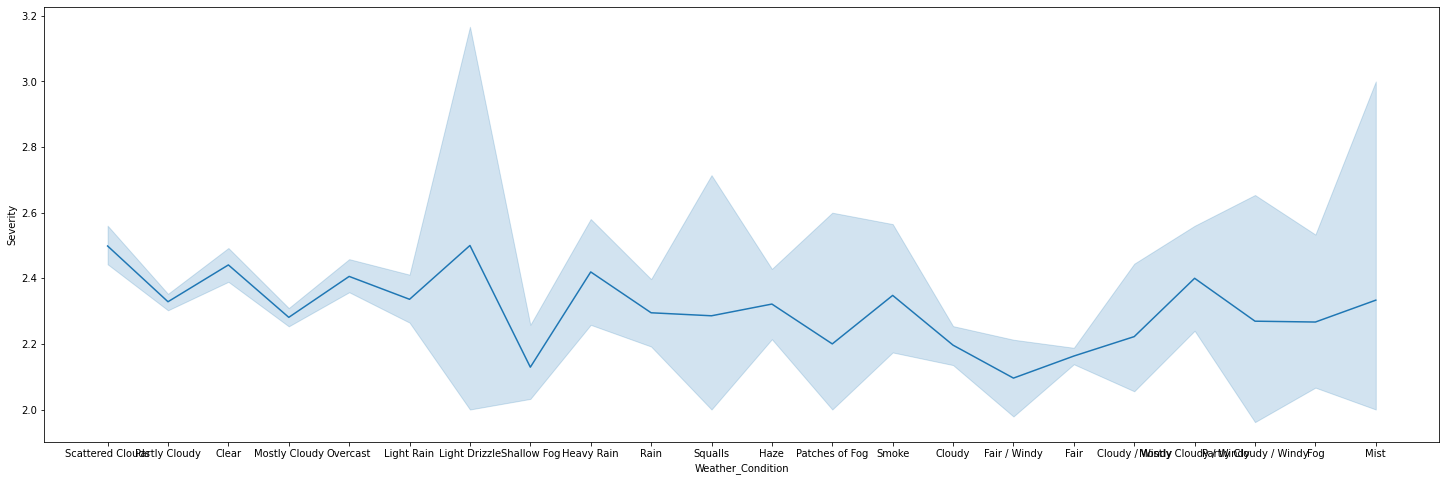

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25, 8))
sns.lineplot(ax=ax, data=dfx , x='Weather_Condition', y='Severity')

In [32]:
'''
dfx.Weather_Condition.replace(['Partly Cloudy', 'Mostly Cloudy', 'Fair', 'Overcast', 'Clear','Cloudy',
                                 'Scattered Clouds','Light Rain','Fair / Windy','Haze', 'Rain','Partly Cloudy / Windy'
                                 ,'Mostly Cloudy / Windy','Heavy Rain','Fog', 'Shallow Fog', 'Smoke', 'Cloudy / Windy'
                                 ,'Light Rain / Windy', 'Light Drizzle', 'Mist','Patches of Fog','Rain / Windy'
                                 , 'Fog / Windy','Squalls', 'Light Thunderstorms and Rain'], 
                                [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                15,16,17,18,19,20,21,22,23,24,25,26], inplace=True)
'''

"\ndfx.Weather_Condition.replace(['Partly Cloudy', 'Mostly Cloudy', 'Fair', 'Overcast', 'Clear','Cloudy',\n                                 'Scattered Clouds','Light Rain','Fair / Windy','Haze', 'Rain','Partly Cloudy / Windy'\n                                 ,'Mostly Cloudy / Windy','Heavy Rain','Fog', 'Shallow Fog', 'Smoke', 'Cloudy / Windy'\n                                 ,'Light Rain / Windy', 'Light Drizzle', 'Mist','Patches of Fog','Rain / Windy'\n                                 , 'Fog / Windy','Squalls', 'Light Thunderstorms and Rain'], \n                                [1,2,3,4,5,6,7,8,9,10,11,12,13,14,\n                                15,16,17,18,19,20,21,22,23,24,25,26], inplace=True)\n"

In [33]:
dfy = pd.get_dummies(dfx.Weather_Condition)

In [34]:
dfy

,Clear,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,...,Mostly Cloudy / Windy,Overcast,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Rain,Scattered Clouds,Shallow Fog,Smoke,Squalls
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6403,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6404,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6405,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
dfx = dfx.drop('Weather_Condition',axis = 1)
dfx = dfx.join(dfy)
dfx.columns

Index(['ID', 'Distance(mi)', 'Crossing', 'Junction', 'Railway', 'Stop',
       'Amenity', 'Side', 'Severity', 'timestamp', 'new_date_column', 'Year',
       'Day', 'Month', 'Hour', 'Temperature(F)', 'Humidity(%)',
       'Wind_Speed(mph)', 'Visibility(mi)', 'Selected', 'Clear', 'Cloudy',
       'Cloudy / Windy', 'Fair', 'Fair / Windy', 'Fog', 'Haze', 'Heavy Rain',
       'Light Drizzle', 'Light Rain', 'Mist', 'Mostly Cloudy',
       'Mostly Cloudy / Windy', 'Overcast', 'Partly Cloudy',
       'Partly Cloudy / Windy', 'Patches of Fog', 'Rain', 'Scattered Clouds',
       'Shallow Fog', 'Smoke', 'Squalls'],
      dtype='object')

In [36]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     6407 non-null   int64         
 1   Distance(mi)           6407 non-null   float64       
 2   Crossing               6407 non-null   int32         
 3   Junction               6407 non-null   int32         
 4   Railway                6407 non-null   int32         
 5   Stop                   6407 non-null   int32         
 6   Amenity                6407 non-null   int32         
 7   Side                   6407 non-null   int64         
 8   Severity               6407 non-null   int64         
 9   timestamp              6407 non-null   datetime64[ns]
 10  new_date_column        6407 non-null   datetime64[ns]
 11  Year                   6407 non-null   int64         
 12  Day                    6407 non-null   int64         
 13  Mon

In [37]:
dfx['Hour'].value_counts()
hour = []
for i in dfx['Hour']:
    if i == 16 or i == 17 or i == 18 or i == 9 or i == 15:
        hour.append(5)
    elif i == 14 or i ==8 or i ==13 or i==19 or i == 10:
        hour.append(4)
    elif i == 11 or i ==21 or i ==6 or i == 5:
        hour.append(3)
    elif i==22 or i==20 or i ==12 or i ==1 or i ==23 or i ==0:
        hour.append(2)
    else:
        hour.append(1)

In [38]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     6407 non-null   int64         
 1   Distance(mi)           6407 non-null   float64       
 2   Crossing               6407 non-null   int32         
 3   Junction               6407 non-null   int32         
 4   Railway                6407 non-null   int32         
 5   Stop                   6407 non-null   int32         
 6   Amenity                6407 non-null   int32         
 7   Side                   6407 non-null   int64         
 8   Severity               6407 non-null   int64         
 9   timestamp              6407 non-null   datetime64[ns]
 10  new_date_column        6407 non-null   datetime64[ns]
 11  Year                   6407 non-null   int64         
 12  Day                    6407 non-null   int64         
 13  Mon

In [39]:
dfx['hour_priority'] = hour

In [40]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     6407 non-null   int64         
 1   Distance(mi)           6407 non-null   float64       
 2   Crossing               6407 non-null   int32         
 3   Junction               6407 non-null   int32         
 4   Railway                6407 non-null   int32         
 5   Stop                   6407 non-null   int32         
 6   Amenity                6407 non-null   int32         
 7   Side                   6407 non-null   int64         
 8   Severity               6407 non-null   int64         
 9   timestamp              6407 non-null   datetime64[ns]
 10  new_date_column        6407 non-null   datetime64[ns]
 11  Year                   6407 non-null   int64         
 12  Day                    6407 non-null   int64         
 13  Mon

In [41]:
dfx['cloudy'] = dfx['Cloudy'] + dfx['Cloudy / Windy'] + dfx['Mostly Cloudy'] + dfx['Mostly Cloudy / Windy'] + dfx['Partly Cloudy'] + dfx['Partly Cloudy / Windy']

In [42]:
dlist= ['Cloudy' ,'Cloudy / Windy' , 'Mostly Cloudy','Mostly Cloudy / Windy','Partly Cloudy','Partly Cloudy / Windy']
dfx.drop(dlist, axis=1, inplace=True)

In [43]:
dfx['rain'] = dfx['Heavy Rain'] + dfx['Light Rain'] + dfx['Rain'] 
dfx['fog'] = dfx['Fog'] + dfx['Patches of Fog'] + dfx['Shallow Fog'] 
dfx['fair'] = dfx['Fair'] + dfx['Fair / Windy'] + dfx['Clear']
dfx['drizzle'] = dfx['Light Drizzle'] + dfx['Mist'] + dfx['Squalls']
dfx['smoke'] = dfx['Scattered Clouds'] + dfx['Overcast'] + dfx['Smoke'] + dfx['Haze']

llist = ['Heavy Rain','Light Rain','Rain','Fog','Patches of Fog','Shallow Fog','Fair','Fair / Windy','Clear','Light Drizzle','Mist','Squalls',
        'Scattered Clouds','Overcast','Smoke','Haze']
dfx.drop(llist, axis=1, inplace=True)

In [44]:
duplicate = dfx[dfx.duplicated()]
dfx.drop_duplicates(keep='first', inplace=True)

In [45]:
dfx.drop(['Selected','timestamp'],axis=1, inplace=True)

In [46]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               6407 non-null   int64         
 1   Distance(mi)     6407 non-null   float64       
 2   Crossing         6407 non-null   int32         
 3   Junction         6407 non-null   int32         
 4   Railway          6407 non-null   int32         
 5   Stop             6407 non-null   int32         
 6   Amenity          6407 non-null   int32         
 7   Side             6407 non-null   int64         
 8   Severity         6407 non-null   int64         
 9   new_date_column  6407 non-null   datetime64[ns]
 10  Year             6407 non-null   int64         
 11  Day              6407 non-null   int64         
 12  Month            6407 non-null   int64         
 13  Hour             6407 non-null   int64         
 14  Temperature(F)   6407 non-null   float64

(array([ 129.,    0.,    0., 4346.,    0.,    0., 1855.,    0.,    0.,
          77.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

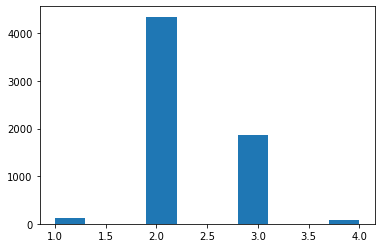

In [47]:
plt.hist(dfx['Severity'])

In [48]:
dfx['Severity'].value_counts()

2    4346
3    1855
1     129
4      77
Name: Severity, dtype: int64

In [49]:
#listt=[]
#for i in  dfx['new_date_column']:
    # listt.append(i.strftime('%y/%m/%d'))
#dfx['New_data_col'] = listt

In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dfx['New_data_col'] = labelencoder.fit_transform(dfx['new_date_column'])
dfx

,ID,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,new_date_column,...,Wind_Speed(mph),Visibility(mi),hour_priority,cloudy,rain,fog,fair,drizzle,smoke,New_data_col
0,3657,0.000,0,1,0,0,0,0,2,2016-03-23,...,12.7,10.0,2,0,0,0,0,0,1,0
1,3724,0.010,0,0,0,0,0,0,3,2016-03-23,...,12.7,10.0,2,0,0,0,0,0,1,0
2,6024,0.150,0,1,0,0,0,0,2,2016-03-23,...,12.7,10.0,2,0,0,0,0,0,1,0
3,985,0.039,0,1,0,0,0,0,2,2016-03-24,...,21.9,10.0,5,0,0,0,0,0,1,1
4,1960,0.010,0,1,0,0,0,0,3,2016-03-24,...,21.9,10.0,5,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,401,1.118,0,0,0,0,0,0,2,2020-12-31,...,12.0,8.0,1,0,0,0,1,0,0,1534
6403,3832,0.106,0,0,0,0,0,0,2,2020-12-31,...,12.0,8.0,1,0,0,0,1,0,0,1534
6404,3152,0.397,0,0,0,0,0,0,2,2020-12-31,...,12.0,8.0,1,0,0,0,1,0,0,1534
6405,6375,0.043,0,0,0,0,0,0,2,2020-12-31,...,12.0,8.0,1,0,0,0,1,0,0,1534


10.0    520
0.0     362
15.0    360
5.0     288
3.5     263
5.8     255
8.0     243
3.0     230
12.0    210
7.0     210
10.4    206
8.1     205
11.5    204
4.6     203
17.3    192
6.0     191
6.9     186
14.0    185
9.2     171
9.0     149
12.7    143
13.8    138
13.0    133
16.1    119
16.0    116
18.4    115
23.0    109
20.0    105
18.0    100
17.0     74
21.9     69
20.7     60
19.6     55
21.0     52
22.0     37
24.2     29
26.5     20
27.6     19
25.3     17
26.0     16
25.0     11
28.0     11
28.8      9
36.8      6
32.2      3
33.4      3
29.0      2
31.0      1
24.0      1
30.0      1
Name: Wind_Speed(mph), dtype: int64

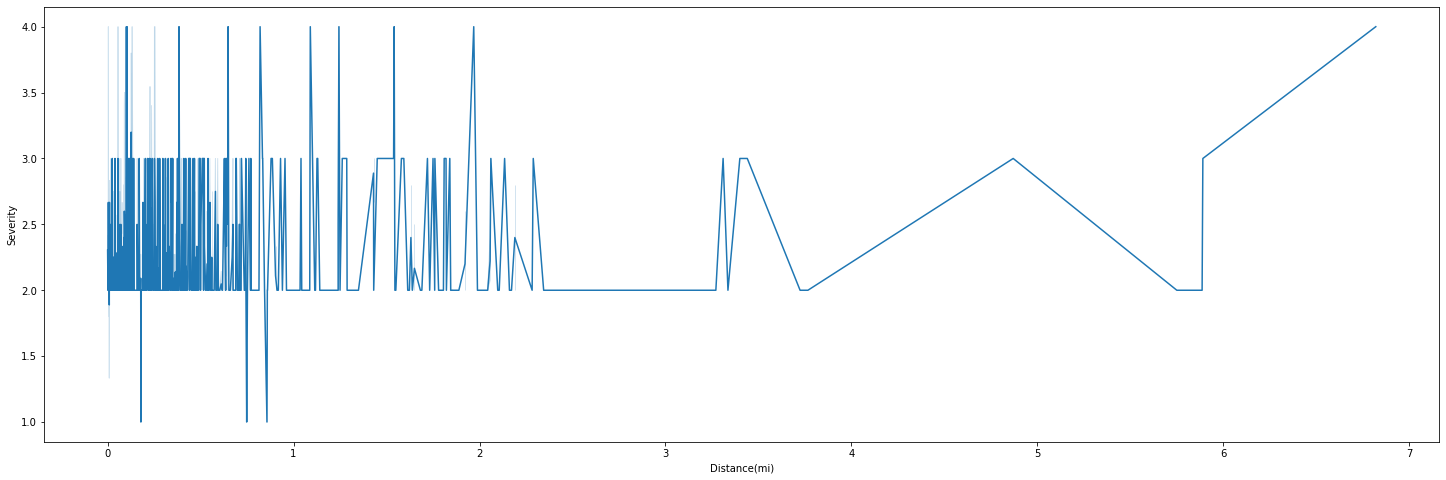

In [51]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.lineplot(ax=ax, data=dfx , x='Distance(mi)', y='Severity')
dfx['Wind_Speed(mph)'].value_counts()

In [52]:
temp = []
for i in dfx['Temperature(F)']:
    if (i > 20 and i <= 45) or (i > 86 and i <96 ) :
        temp.append(10)
    elif i > 45 and i <= 60:
        temp.append(7)
    elif i > 60 and i <= 86:
        temp.append(4)
    else:
        temp.append(1)

In [53]:
dfx['temp_priority'] = temp
dfx.drop(['Temperature(F)'], axis=1, inplace=True)

In [54]:
dfx.drop(['new_date_column'],axis=1 ,inplace =True)

In [55]:
dfx2 = dfx.drop(['Severity'],axis=1)
dfx2

,ID,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Year,Day,...,Visibility(mi),hour_priority,cloudy,rain,fog,fair,drizzle,smoke,New_data_col,temp_priority
0,3657,0.000,0,1,0,0,0,0,2016,23,...,10.0,2,0,0,0,0,0,1,0,7
1,3724,0.010,0,0,0,0,0,0,2016,23,...,10.0,2,0,0,0,0,0,1,0,7
2,6024,0.150,0,1,0,0,0,0,2016,23,...,10.0,2,0,0,0,0,0,1,0,7
3,985,0.039,0,1,0,0,0,0,2016,24,...,10.0,5,0,0,0,0,0,1,1,7
4,1960,0.010,0,1,0,0,0,0,2016,24,...,10.0,5,0,0,0,0,0,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,401,1.118,0,0,0,0,0,0,2020,31,...,8.0,1,0,0,0,1,0,0,1534,7
6403,3832,0.106,0,0,0,0,0,0,2020,31,...,8.0,1,0,0,0,1,0,0,1534,7
6404,3152,0.397,0,0,0,0,0,0,2020,31,...,8.0,1,0,0,0,1,0,0,1534,7
6405,6375,0.043,0,0,0,0,0,0,2020,31,...,8.0,1,0,0,0,1,0,0,1534,7


In [56]:
dfx2['Severity']

KeyError: 'Severity'

In [58]:
from sklearn import preprocessing
x = dfx2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfx2=pd.DataFrame(x_scaled, columns=dfx2.columns)

In [59]:
dfx2['Severityy'] = dfx['Severity']

In [60]:
dfx2['Severityy']

0       2
1       3
2       2
3       2
4       3
       ..
6402    2
6403    2
6404    2
6405    2
6406    2
Name: Severityy, Length: 6407, dtype: int64

The output shows desciptive statistics for the numerical features, `Lat`, `Lng`, `Distance(mi)`, and `Severity`. I'll use the numerical features to demonstrate how to train the model and make submissions. **However you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.**

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 

*Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument `random_state` in the following command* 

In [ ]:
#rom sklearn.model_selection import train_test_split
#,y = dfx.drop(columns=['Severity', 'Railway','Humidity(%)','Visibility(mi)']), dfx['Severity']

#_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y) # Try adding `stratify` here

#X_train = train_df.drop(columns=['Severity', 'Railway','Humidity(%)','Visibility(mi)'])
#y_train = train_df['Severity']

#X_val = val_df.drop(columns=[ 'Severity', 'Railway','Humidity(%)','Visibility(mi)'])
#y_val = val_df['Severity']

In [61]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(dfx2, test_size=0.2, shuffle=True,random_state=42) # Try adding `stratify` here

#X_train = train_df.drop(columns=['Severity', 'Railway','Humidity(%)','Visibility(mi)','Hour'])
X_train = train_df.drop(columns=['Severityy', 'Railway','Humidity(%)','Visibility(mi)','Hour' ])

y_train = train_df['Severityy']

X_val = val_df.drop(columns=['Severityy', 'Railway','Humidity(%)','Visibility(mi)','Hour'])
y_val = val_df['Severityy']


As pointed out eariler, I'll use the numerical features to train the classifier. **However, you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.** 

In [ ]:
X_train.columns

In [ ]:
X_train.head()

In [ ]:
# This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
#X_train = X_train[['Lat', 'Lng', 'Distance(mi)']]
#X_val = X_val[['Lat', 'Lng', 'Distance(mi)']]

In [62]:
y_train

748     3
5720    2
1310    2
5343    1
1480    3
       ..
3772    2
5191    2
5226    1
5390    3
860     3
Name: Severityy, Length: 5125, dtype: int64

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)

Now let's test our classifier on the validation dataset and see the accuracy.

In [64]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7269890795631825


Well. That's a good start, right? A classifier that predicts all examples' `Severity` as 2 will get around 0.63. You should get better score as you add more features and do better data preprocessing.

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()


In [ ]:
test_df.drop(['Bump', 'Give_Way','No_Exit','Roundabout','Lat' ,'Lng'], axis=1, inplace=True)


In [ ]:
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df['new_date_column'] = test_df['timestamp'].dt.date
test_df['new_date_column'] = pd.to_datetime(test_df['new_date_column'])

In [ ]:
def Convert_to_int(Df_col) :
    test_df[Df_col] = test_df[Df_col].astype(int)
Convert_to_int('Crossing')
Convert_to_int('Junction')
Convert_to_int('Railway')
Convert_to_int('Stop')
Convert_to_int('Amenity')

In [ ]:
test_df['Side'] = test_df['Side'].replace({'R':0 ,'L':1})
test_df['Side']

In [ ]:
test_df = test_df.sort_values('new_date_column')

In [ ]:
test_df

In [ ]:
dfx1 = pd.merge_asof(test_df, weather, on='new_date_column')


In [ ]:
#dfx1.dropna(inplace=True)
#dfx1

In [ ]:
dfyy = pd.get_dummies(dfx1.Weather_Condition)
dfx1 = dfx1.drop('Weather_Condition',axis = 1)
dfx1 = dfx1.join(dfyy)
dfx1.columns

In [ ]:
dfx1['Hour'].value_counts()
hour1 = []
for i in dfx1['Hour']:
    if i == 16 or i == 17 or i == 18 or i == 9 or i == 15:
        hour1.append(5)
    elif i == 14 or i ==8 or i ==13 or i==19 or i == 10:
        hour1.append(4)
    elif i == 11 or i ==21 or i ==6 or i == 5:
        hour1.append(3)
    elif i==22 or i==20 or i ==12 or i ==1 or i ==23 or i ==0:
        hour1.append(2)
    else:
        hour1.append(1)

In [ ]:
dfx1['hour_priority'] = hour1

In [ ]:
dfx1['cloudy'] = dfx1['Cloudy'] + dfx1['Cloudy / Windy'] + dfx1['Mostly Cloudy'] + dfx1['Mostly Cloudy / Windy'] + dfx1['Partly Cloudy'] + dfx1['Partly Cloudy / Windy']

In [ ]:
dlist1= ['Cloudy' ,'Cloudy / Windy' , 'Mostly Cloudy','Mostly Cloudy / Windy','Partly Cloudy','Partly Cloudy / Windy']
dfx1.drop(dlist1, axis=1, inplace=True)

In [ ]:
dfx1['rain'] = dfx1['Heavy Rain'] + dfx1['Light Rain'] + dfx1['Rain'] 
dfx1['fog'] = dfx1['Fog'] + dfx1['Patches of Fog'] + dfx1['Shallow Fog'] 
dfx1['fair'] = dfx1['Fair'] + dfx1['Fair / Windy'] + dfx1['Clear']
#dfx1['drizzle'] = dfx1['Light Drizzle']  + dfx1['Mist']+ dfx1['Squalls']
dfx1['smoke'] = dfx1['Scattered Clouds'] + dfx1['Overcast'] + dfx1['Smoke'] + dfx1['Haze']

llist1 = ['Heavy Rain','Light Rain','Rain','Fog','Patches of Fog','Shallow Fog','Fair','Fair / Windy','Clear',
        'Scattered Clouds','Overcast','Smoke','Haze']
dfx1.drop(llist1, axis=1, inplace=True)

In [ ]:
#duplicate = dfx1[dfx1.duplicated()]
#dfx1.drop_duplicates(keep='first', inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dfx1['New_data_col'] = labelencoder.fit_transform(dfx1['new_date_column'])


In [ ]:
dfx1.drop(['Selected','timestamp'],axis=1, inplace=True)

In [ ]:
dfx1.drop(['new_date_column'],axis=1 ,inplace =True)

Note that the test set has the same features and doesn't have the `Severity` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `Severity` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [ ]:
dfx1.columns

In [ ]:
dfx1

In [ ]:
X_test = dfx1.drop(columns =['Railway','Humidity(%)','Visibility(mi)','Hour'])

# You should update/remove the next line once you change the features used for training
print(X_test.columns)
y_test_predicted = classifier.predict(X_test)

dfx1['Severity'] = y_test_predicted


In [ ]:
len(y_test_predicted)

In [ ]:
dfx1

Now we're ready to generate the submission file. The submission file needs the columns `ID` and `Severity` only.

In [ ]:
dfx1[['ID', 'Severity']].to_csv('/kaggle/working/submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Scroll down until you see the output files then select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.